# 4th September EDA

In [ ]:
# EDA (Practicals)

In [ ]:
# C:\Users\KARTHIKRAGHAVAN\Desktop\Ineuron\Notebooks\Advanced-House-Price-Prediction--master

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlt
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\KARTHIKRAGHAVAN\Desktop\Ineuron\Notebooks\Advanced-House-Price-Prediction--master\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

## All the Lifecycle In A Data Science Projects
1. Data Analysis / Data Preprocessing
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [27]:
FeaturesWithNA = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
len(FeaturesWithNA)

19

In [28]:
NumericalFeatures = [feature for feature in df.columns if df[feature].dtype != object]
len(NumericalFeatures)

38

In [26]:
CategoricalFeatures = [feature for feature in df.columns if df[feature].dtype == object]
len(CategoricalFeatures)

43

In [32]:
len([feature for feature in df.columns if df[feature].dtype == 'int64'])

35

In [33]:
len([feature for feature in df.columns if df[feature].dtype == 'float64'])

3

In [42]:
FeatureWithYEAR = [feature for feature in NumericalFeatures if 'Yr' in feature or 'Year' in feature]
len(FeatureWithYEAR)

4

In [35]:
# Observation

# 19 features has null values(FeaturesWithNA).
# There are 38 numerical features (35 integer and 3 float values)
# There are 43 categorical features
# There are features with year data with int datetime (Temporary Values). There are 4 features

In [43]:
df.describe() # mostly we get for numerical data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [44]:
df.describe(include = object) # mostly we get for categorical data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [45]:
df[NumericalFeatures]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [57]:
DiscreteFeatures = [feature for feature in NumericalFeatures if df[feature].nunique() < 15]
df[DiscreteFeatures]

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2,2008
1,6,8,0,1,2,0,3,1,6,1,2,0,5,2007
2,7,5,1,0,2,1,3,1,6,1,2,0,9,2008
3,7,5,1,0,1,0,3,1,7,1,3,0,2,2006
4,8,5,1,0,2,1,4,1,9,1,3,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,0,0,2,1,3,1,7,1,2,0,8,2007
1456,6,6,1,0,2,0,3,1,7,2,2,0,2,2010
1457,7,9,0,0,2,0,4,1,9,2,1,0,5,2010
1458,5,6,1,0,1,0,2,1,5,0,1,0,4,2010


###### Demo using Titanic Dataset

In [58]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
titanic.shape

(891, 15)

In [60]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [67]:
FeaturesWithNA = [feature for feature in titanic.columns if titanic[feature].isnull().sum() >= 1]
len(FeaturesWithNA)

4

In [68]:
NumericalFeatures = [feature for feature in titanic.columns if titanic[feature].dtype != object]
len(NumericalFeatures)

10

In [69]:
CategoricalFeatures = [feature for feature in titanic.columns if titanic[feature].dtype == object]
len(CategoricalFeatures)

5

In [70]:
len([feature for feature in titanic.columns if titanic[feature].dtype == 'int64'])

4

In [71]:
len([feature for feature in titanic.columns if titanic[feature].dtype == 'float64'])

2

In [72]:
FeatureWithYEAR = [feature for feature in NumericalFeatures if 'Yr' in feature or 'Year' in feature]
len(FeatureWithYEAR)

0

In [74]:
DiscreteFeatures = [feature for feature in NumericalFeatures if titanic[feature].nunique() < 15]
titanic[DiscreteFeatures]

,survived,pclass,sibsp,parch,class,adult_male,deck,alone
0,0,3,1,0,Third,True,NaN,False
1,1,1,1,0,First,False,C,False
2,1,3,0,0,Third,False,NaN,True
3,1,1,1,0,First,False,C,False
4,0,3,0,0,Third,True,NaN,True
...,...,...,...,...,...,...,...,...
886,0,2,0,0,Second,True,NaN,True
887,1,1,0,0,First,False,B,True
888,0,3,1,2,Third,False,NaN,False
889,1,1,0,0,First,True,C,True


In [ ]:
# Observation

# 4 features has null values(FeaturesWithNA).
# There are 10 numerical features (2 boolean, 2 categorical,4 integer and 2 float values)
# There are 5 categorical features

<AxesSubplot:>

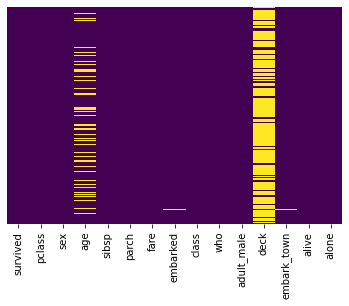

In [77]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [78]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='survived', ylabel='count'>

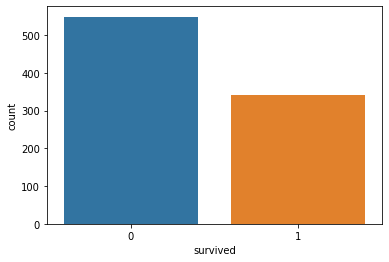

In [79]:
sns.countplot(x = 'survived',data= titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

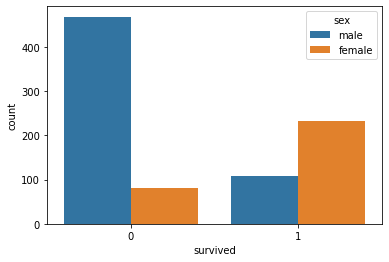

In [82]:
sns.countplot(x = 'survived',data= titanic,hue='sex')

<AxesSubplot:xlabel='survived', ylabel='count'>

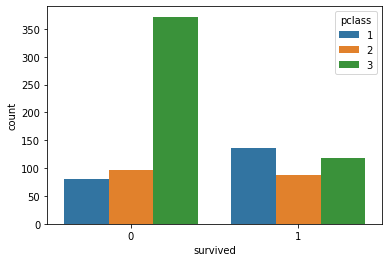

In [84]:
sns.countplot(x = 'survived',data= titanic,hue='pclass')

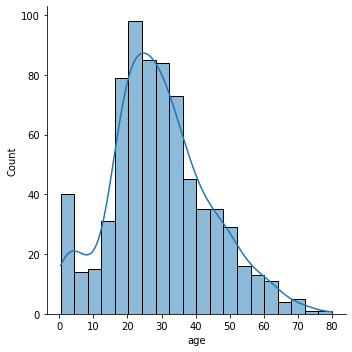

In [93]:
sns.displot(titanic['age'],kde = True)

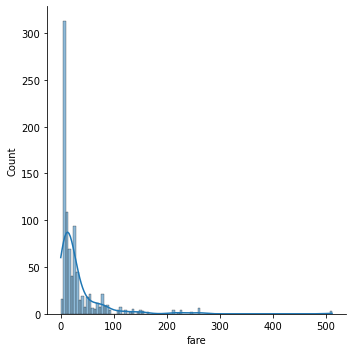

In [94]:
sns.displot(titanic['fare'],kde = True)

<AxesSubplot:xlabel='pclass', ylabel='age'>

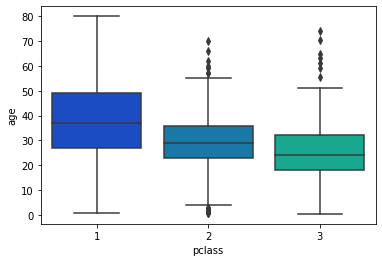

In [97]:
sns.boxplot(x = 'pclass',y='age',data=titanic,palette='winter')